<h1> <center> <font color="blue"> AdaBoost </center></h1>

<center><img src="pics/Training-of-an-AdaBoost-classifier-The-first-classifier-trains-on-unweighted-data-then.png" width=600></center>

<link> Source : https://www.researchgate.net/figure/Training-of-an-AdaBoost-classifier-The-first-classifier-trains-on-unweighted-data-then_fig3_306054843 <\link>

<h3> <font color="blue"> Pros </h3>

1. Performs well on **high dimesnioal** data.
2. Very accurate in classification tasks.
3. Faster compared to **bagging** classifier.

<h3> <font color = "red"> Cons </h3>

1. Can not be parallelized.
2. Can be sensitive to small change in the dataset. Need to be careful with **hyper-parameter**

<h3> <font color = "green"> How it works </h3>

<p> AdaBoost works with <b>Sequential</b> trees. Each tree learns from its previous one. </p>

1. Initially all training samples are given equal weights. So if we have 100 training samples, the sample weight will be 1/00 for EACH of the training sample.

2. Create a Decision Stump. This will be Decision Tree with one node only.
Calcuate the number of correct and incorrect predictions (MSE in case of Regression)
Suppose we had 20 incorrect and 80 correct.</p2>

3. Calculate by following formula</p2>

    Significance = 1 / 2 (log (1-TotalError)/TotalError)
    
    TotalError = 20 / 100
    
    Significance = 0.69
    
    Alpha or Significance decrease with **error-rate**
    
    For fair coin click or random guess the error rate is 0.5 and hence alpha or significance == 0
    
    - For higher error rate the alpha is high on negative side i.e. -2,-1 etc.
    
    - For lower error rate the alpha is high on positive side i.e. 2,1 etc
 
4. For Incorrect Observation : New Sample Weights = Sample Weight * e ^ Significance = 0.2 * 1.99 = 0.398
    
5. For Correct Observations : New Sample Weights = Sample Weight * e ^ - Significance = 0.2 * 0.50 = 0.10
    
6. Idea is to **Penalize**. wrong classification , while **depanelize** correct classification.

7. This Step will Continue until the weights can not be gone down.
    

In [8]:
import numpy as np

In [14]:
error_rate = 0.2
print("Alpha is : " + str(0.5*np.log((1-error_rate)/error_rate)))

Alpha is : 0.6931471805599453


In [15]:
error_rate = 0.8
print("Alpha is : ", 0.5 * np.log((1-error_rate)/error_rate))

Alpha is :  -0.6931471805599454


<p><font color = "green"> Alpha or Significance is important to make sure weak classifier inputs are not <b>heaviliy</b> influencing the mode, while , strong classifiers 
    have <b>more</b> saying in the final model </p>

<h3> <span style="background:yellow"> Hyper-parameters </h3>

1. base_estimator : Algorithm to be used as base learner. Classifier. Decision Tree. Can use other machine learning as well such as Logisitc Regression. 
2. n_estimator : Number of Base Estimaior. Default is 50. Number of Estimator. After this it will be iteratred
3. learning_rate : the amount of learning with each iteration. Similar as Gradient Descent. 
4. Max_depth : Maximum depth of tree

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
credit = pd.read_csv('/Users/bt/Documents/GITHUB/creditcard.csv')
credit.drop('Time', axis=1, inplace=True)

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [44]:
X = credit.drop('Class', axis=1)
y = credit['Class'].values.ravel()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,random_state=1231,stratify=y, test_size=0.3)

In [57]:
model = AdaBoostClassifier(n_estimators=10, learning_rate=0.1, random_state=123)

In [58]:
model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=10, random_state=123)

In [59]:
predictions = model.predict(X_test)

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.57      0.69       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [65]:
print(pd.DataFrame(confusion_matrix(y_test,predictions), columns=['Pred : Yes','Pred : No'], index=['Actual : Yes', 'Actual : No']))

              Pred : Yes  Pred : No
Actual : Yes       85282         13
Actual : No           63         85


In [76]:
print('Precision Score : ', precision_score(y_test,predictions))
print('Recall Score : ', recall_score(y_test,predictions))
print('Accuracy Score : ', accuracy_score(y_test,predictions))

Precision Score :  0.8673469387755102
Recall Score :  0.5743243243243243
Accuracy Score :  0.9991105181231933


In [77]:
from sklearn.model_selection import cross_validate

In [78]:
predicted = cross_validate(AdaBoostClassifier(),X_train,y_train,cv=5,scoring="recall")

In [81]:
print(np.mean(predicted['test_score']))

0.6803069053708439


In [84]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [88]:
ada = AdaBoostClassifier()

pprint(ada.get_params())

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [108]:
n_estimator = [int(x) for x in np.linspace(start=10,stop=50,num=5)]
learning_rate = [float(x) for x in np.linspace(start=0.5,stop=1,num=5)]

In [127]:
params = {
      'n_estimators': np.arange(100,300,50),
     'learning_rate': [0.01, 0.05, 0.1, 1],
}

In [128]:
params

{'n_estimators': array([100, 150, 200, 250]),
 'learning_rate': [0.01, 0.05, 0.1, 1]}

In [129]:
ada_grid = GridSearchCV(AdaBoostClassifier(),param_grid=params,n_jobs=-1,cv=5,scoring="recall")

In [130]:
ada_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': array([100, 150, 200, 250])},
             scoring='recall')

In [131]:
ada_grid.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=250)

In [132]:
ada_grid.best_score_

0.7468456947996589

In [133]:
ada_grid.best_params_

{'learning_rate': 1, 'n_estimators': 250}

In [134]:
new_model = AdaBoostClassifier(**ada_grid.best_params_)

In [135]:
new_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=250)

In [157]:
predictions = new_model.predict(X_test)

In [152]:
unique, counts = np.unique(predictions, return_counts=True)

print(unique)
print(counts)

[0 1]
[85315   128]


In [160]:
print("Accuracy Score : ", accuracy_score(y_test,predictions))
print("Recall Score : ", recall_score(y_test,predictions))
print("Precision Score : ", precision_score(y_test,predictions))
print("F 1 Score : ", f1_score(y_test,predictions))

Accuracy Score :  0.9993211848834895
Recall Score :  0.7364864864864865
Precision Score :  0.8515625
F 1 Score :  0.7898550724637682


In [161]:
# Let's see the classification report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.74      0.79       148

    accuracy                           1.00     85443
   macro avg       0.93      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [162]:
tn , fp, fn, tp = confusion_matrix(y_test,predictions).ravel()

In [166]:
print("True Negative : Actual 0 and Predicted 0 : ", tn)
print("True Positive : Actual 1 and Predicted 1 :", tp)
print("False Negative : Actual 1 and Predicted 0 ", fn)
print("False Positive : Actual 0 and Predicted 1 ", fp)

True Negative : Actual 0 and Predicted 0 :  85276
True Positive : Actual 1 and Predicted 1 : 109
False Negative : Actual 1 and Predicted 0  39
False Positive : Actual 0 and Predicted 1  19


<h2> <center> <font color="blue"> ROC Curve </center></h2>

In [167]:
from sklearn.metrics import roc_auc_score, roc_curve

In [169]:
# Probilites of 1

ada_prob_estimates = new_model.predict_proba(X_test)[:,1]

In [171]:
noskill_prob = [ 0 for _ in range(len(y_test))]

In [173]:
noskill_auc = roc_auc_score(y_test,noskill_prob)

In [175]:
ada_auc = roc_auc_score(y_test,ada_prob_estimates)

In [177]:
ns_fpr, ns_tpr, _ = roc_curve(y_test,noskill_prob)

In [178]:
ada_fpr, ada_tpr, _ = roc_curve(y_test,ada_prob_estimates)

In [179]:
from matplotlib import pyplot

pyplot.figure(figsize=(12,8))
pyplot.plot(ns_fpr,ns_tpr,linestyle="--", label="No Skill")
pyplot.plot(rf_fpr,rf_tpr,marker="o", label="Random Forest")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

array([0.        , 0.        , 0.        , ..., 0.99989448, 0.99991793,
       1.        ])

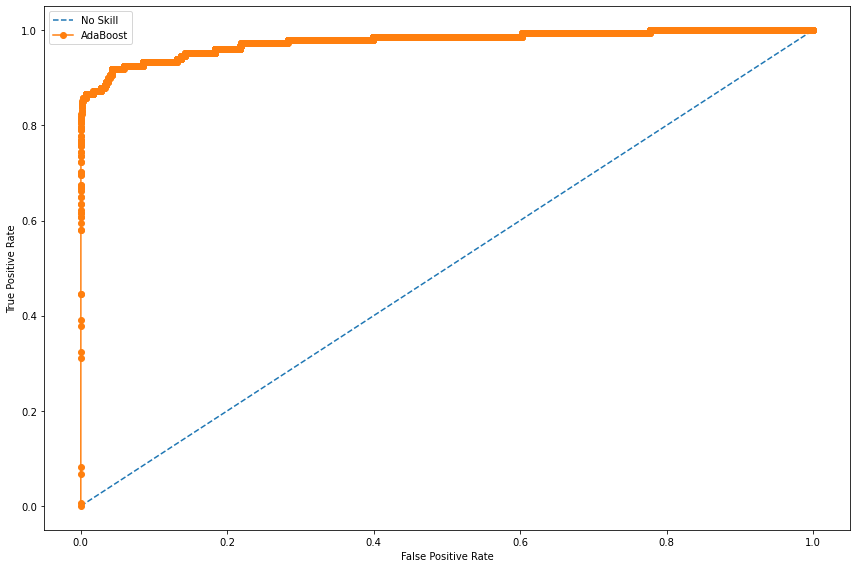

In [185]:
from matplotlib import pyplot

pyplot.figure(figsize=(12,8))
pyplot.plot(ns_fpr,ns_tpr,linestyle="--",label="No Skill")
pyplot.plot(ada_fpr,ada_tpr,marker="o",label="AdaBoost")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
pyplot.tight_layout()


<h2><center><font color="green"> Precision Recall Curve </center></h2>

In [186]:
from sklearn.metrics import precision_recall_curve

In [190]:
ns_precision, ns_recall, _ = precision_recall_curve(y_test,noskill_prob)

In [193]:
ada_precision, ada_recall, _ = precision_recall_curve(y_test,ada_prob_estimates)

In [196]:
no_skill = len(y_test[y_test==1]) / len(y_test)

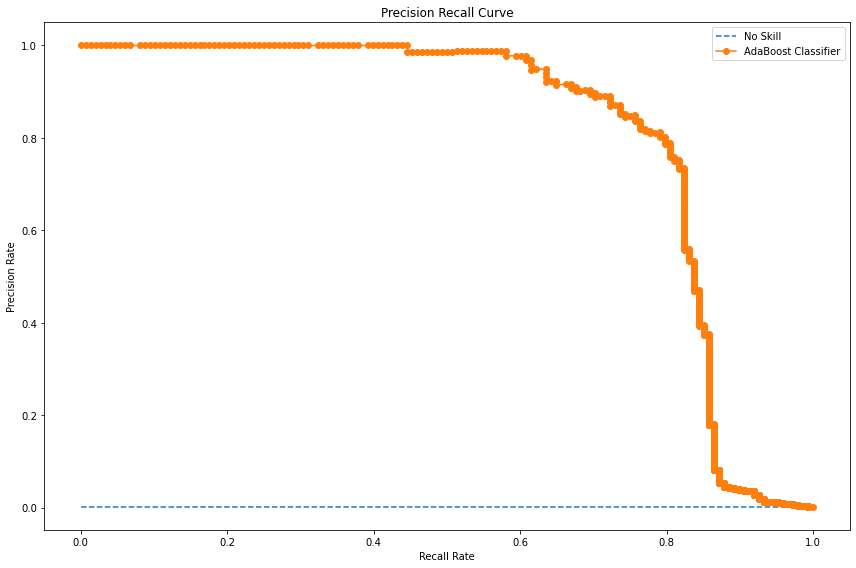

In [204]:
pyplot.figure(figsize=(12,8))
pyplot.plot([0,1],[no_skill,no_skill], linestyle="--", label="No Skill")
pyplot.plot(ada_recall,ada_precision,marker="o",label="AdaBoost Classifier")
pyplot.xlabel("Recall Rate")
pyplot.ylabel("Precision Rate")
pyplot.title("Precision Recall Curve")
pyplot.legend()
pyplot.tight_layout()

<h2><center><font color="grey"> Calibration Curve / Reliability Diagrams </center></h2>

In [210]:
from sklearn.calibration import calibration_curve

In [212]:
prob_true, prob_predicted = calibration_curve(y_test,ada_prob_estimates,n_bins=20,normalize=True)

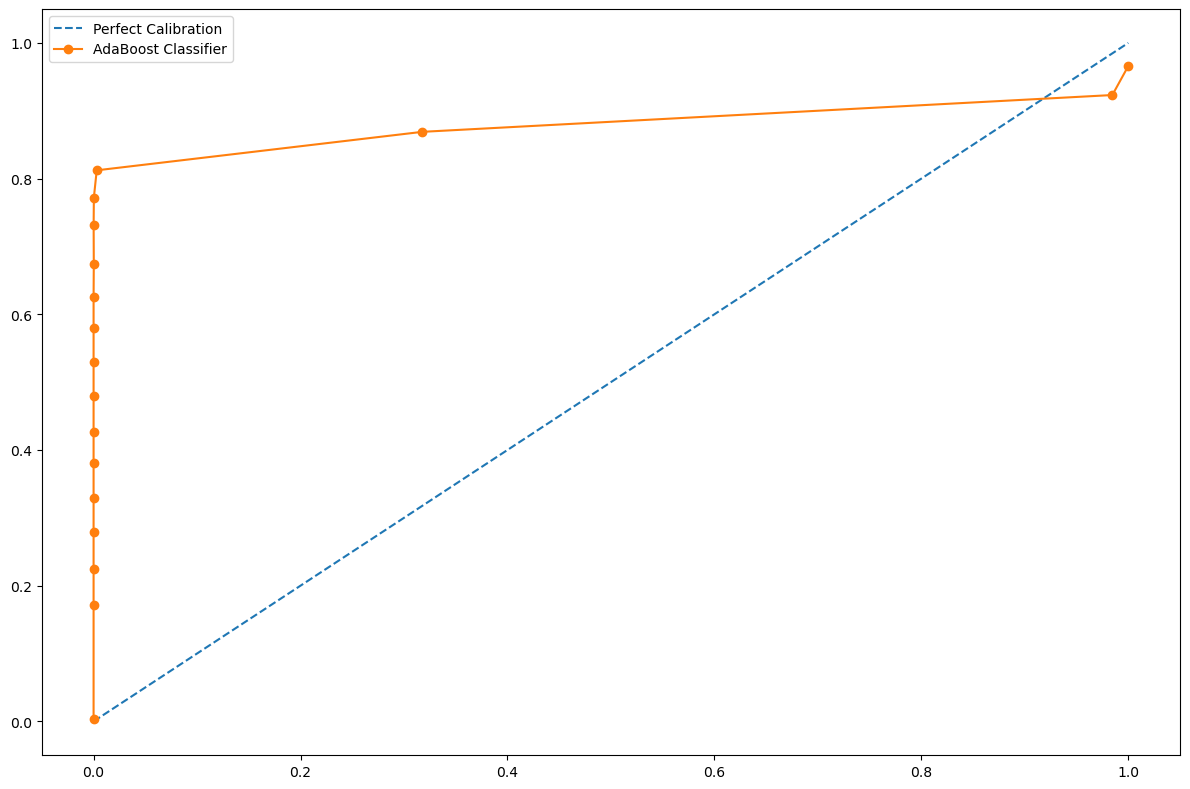

In [241]:
pyplot.figure(figsize=(12,8),dpi=100)
pyplot.plot([0,1],[0,1],linestyle="--",label="Perfect Calibration")
pyplot.plot(prob_true,prob_predicted,marker="o",label="AdaBoost Classifier")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()

<h2> <center> Learning Curve </center></h2>

In [220]:
from sklearn.model_selection import learning_curve

In [222]:
train_size, train_score, test_score = learning_curve(AdaBoostClassifier(),
                                                     X_train,
                                                     y_train,
                                                     cv=10,
                                                     scoring="recall",
                                                     n_jobs=-1,
                                                     train_sizes=np.linspace(0.01,1.0,50))

In [230]:
train_means = np.mean(train_score,axis=1)

In [231]:
test_means = np.mean(test_score,axis=1)

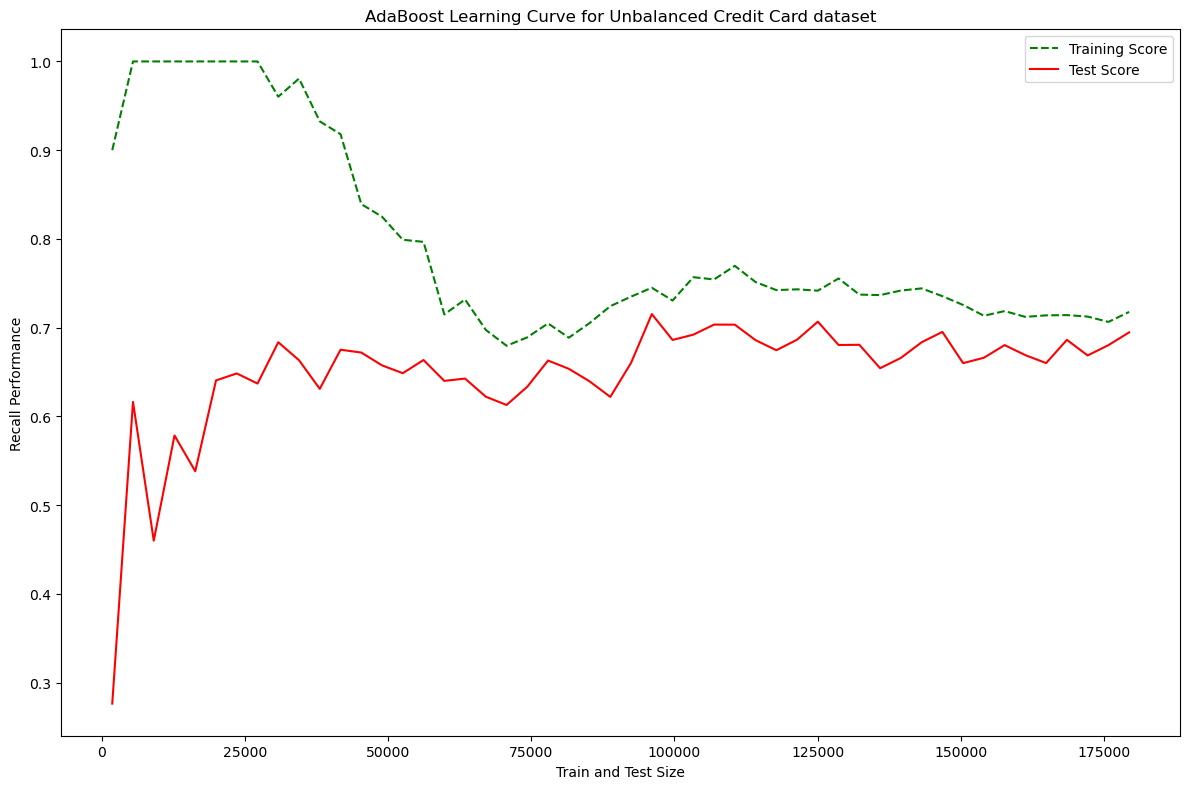

In [244]:
pyplot.figure(figsize=(12,8),dpi=100)
pyplot.plot(train_size,train_means,linestyle="--",color="g",label="Training Score")
pyplot.plot(train_size,test_means,linestyle="-",color="r",label="Test Score")
pyplot.xlabel("Train and Test Size")
pyplot.ylabel("Recall Performance")
pyplot.title('AdaBoost Learning Curve for Unbalanced Credit Card dataset')
pyplot.legend()
pyplot.tight_layout()
pyplot.show()